In [1]:
from qiskit import *
import qiskit as qk

In [2]:
# membuat sirkuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
%matplotlib inline
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [3]:
# menerapkan gerbang logika hadermak membuat sirkuit
circuit.h(qr[0])

In [4]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [5]:
circuit.cx(qr[0], qr[1])

In [6]:
circuit.draw()
#gambar di bawah ini sudah terdiri dari 2 sirkuit
# yang mana ada gerbang logika hadermak dan gerbang logika x/cnot

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [7]:
circuit.measure(qr, cr)
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [8]:
# melakukan simulasi gerbang logika yang kita buat dengan menggunakan simulator
simulasi = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulasi).result()

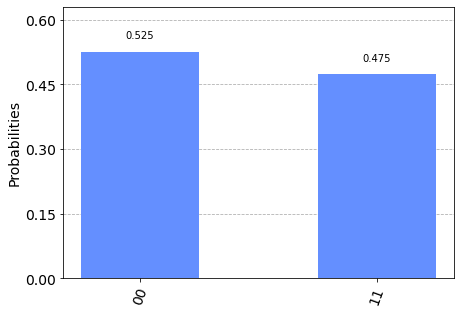

In [9]:
#hasil untuk menjalankan sirkuit yang kita buat
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [10]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
provider = IBMQ.get_provider(hub='ibm-q')


In [12]:
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = execute(circuit, backend=qcomp)

In [13]:
from qiskit.tools.monitor import job_monitor

In [14]:
job_monitor(job)

Job Status: job has successfully run


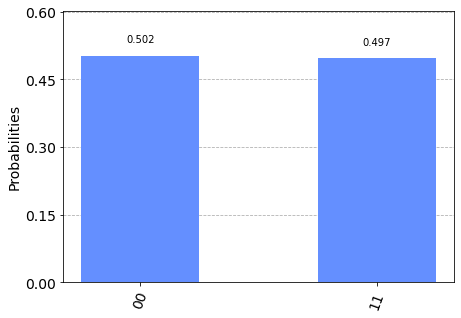

In [15]:
result = job.result()
plot_histogram(result.get_counts(circuit))